## PageRank Algorithm

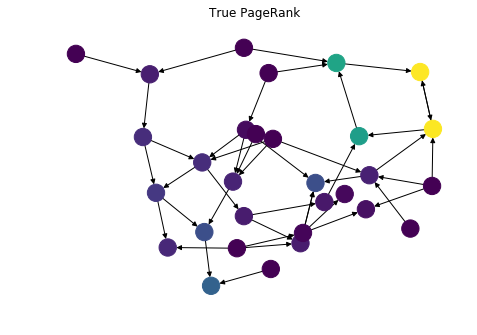

In [1]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import scipy
import random
%matplotlib inline

g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color = [int(v*1000) for v in nx.pagerank(g).values()])
plt.title("True PageRank")
plt.show()

In [2]:
import random

def get_pagerank(g, n=10000, alpha=.85):
    """Random surfer approximation to pagerank
    Given a graph it returns a dict of ranks after n random surfs
    """
    
    # set initial rank
    for node in list(g.nodes):
        g.nodes[node]['rank'] = 0
        
    # pick random starting point
    current = random.choice(list(g.nodes))
    
    for _ in range(n):
        # note rank increase
        g.nodes[current]['rank'] += 1
        if random.random() < alpha and len(list(g.neighbors(current))) > 0:
            # surf to neighbor
            current = random.choice(list(g.neighbors(current)))
        else:
            # pick new random point
            current = random.choice(list(g.nodes))
    
    # normalize so they sum to 1
    return {key: value / (n * 1.0) for key, value in nx.get_node_attributes(g, 'rank').items()}


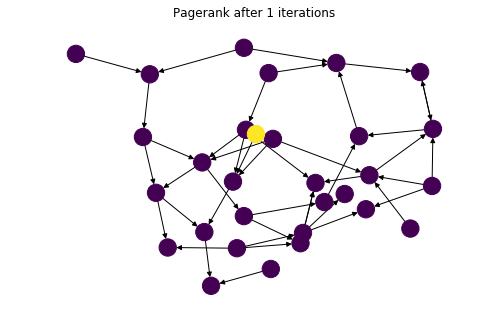

Summed Error to True Values: 5.551115123125783e-17


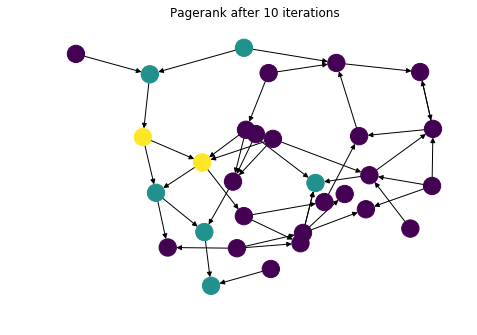

Summed Error to True Values: 2.0816681711721685e-16


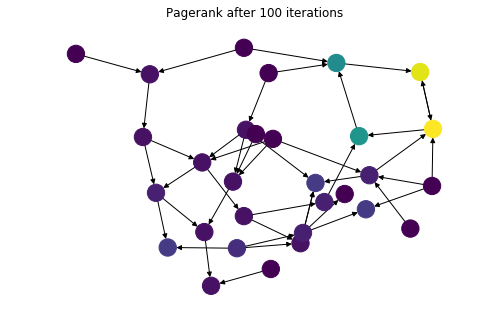

Summed Error to True Values: 1.2663481374630692e-16


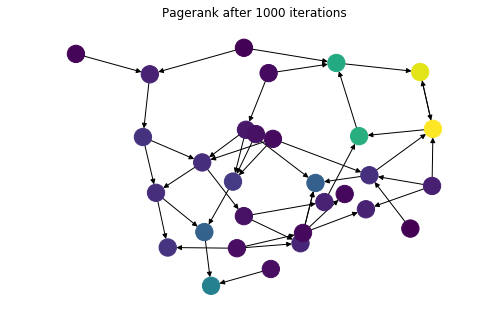

Summed Error to True Values: 1.0581813203458523e-16


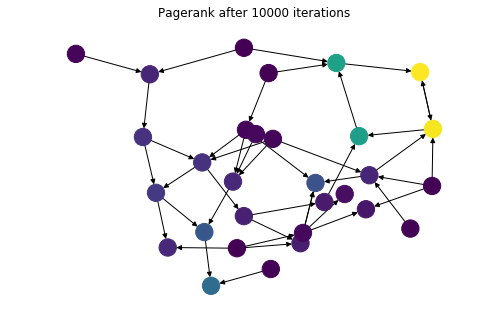

Summed Error to True Values: 8.326672684688674e-17


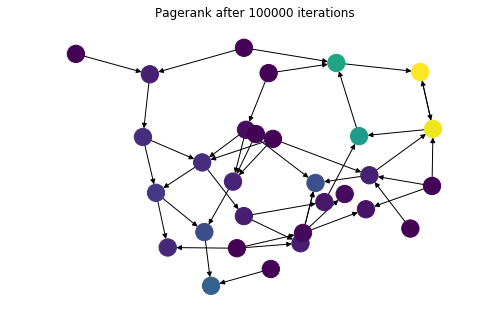

Summed Error to True Values: 1.1622647289044608e-16


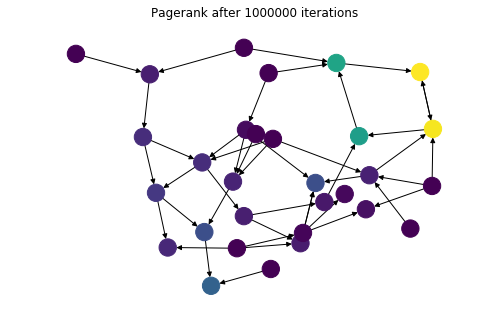

Summed Error to True Values: 1.3704315460216776e-16


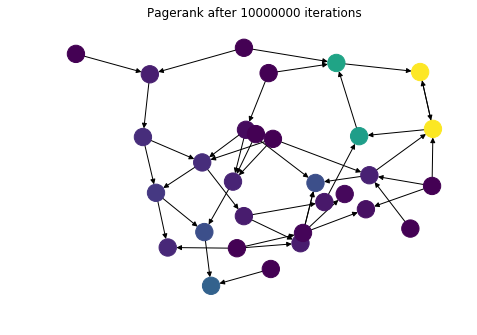

Summed Error to True Values: 1.214306433183765e-16


In [3]:
import numpy as np
import scipy
for n in scipy.logspace(0,7,8):
    ranks = get_pagerank(g, int(n))

    nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color = [int(v*1000) for v in ranks.values()])
    plt.title("Pagerank after {} iterations".format(int(n)))
    plt.show()
    print(f"Summed Error to True Values: {sum(abs(np.array(list(ranks.values()))) -  np.array(list(nx.pagerank(g).values())))}")